# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100
Image dimensions (height, width, channels): (32, 32, 3)


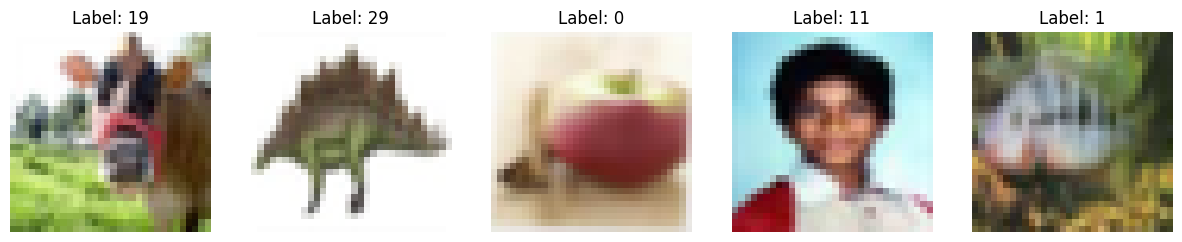

In [78]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# 1. Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# 2. Explore the dataset
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Number of classes:", len(np.unique(y_train)))

# 3. Show image dimensions (height, width, and channels)
image_shape = x_train[0].shape
print("Image dimensions (height, width, channels):", image_shape)

# 4. Display a few examples from the training set
# Set up the plot
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Display 5 random images
for i in range(5):
    ax = axes[i]
    ax.imshow(x_train[i])  # Display image
    ax.set_title(f"Label: {y_train[i][0]}")  # Display label
    ax.axis('off')

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 1. Normalize the images to the range [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Verify normalization
print("Original pixel value range in x_train:", x_train.min(), "-", x_train.max())
print("Normalized pixel value range in x_train_normalized:", x_train_normalized.min(), "-", x_train_normalized.max())

# 2. One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# Verify the transformation
print("Original label (y_train[0]):", y_train[0])  # Example: [19]
print("One-hot encoded label (y_train_one_hot[0]):", y_train_one_hot[0])  # Example: Vector with 1 at index 19
print("Shape of y_train_one_hot:", y_train_one_hot.shape)  # Expected: (50000, 100)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)    # Expected: (10000, 100)


# 3. Split the training set into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized, y_train_one_hot, test_size=0.2, random_state=42
)

print("Training set split into training (80%) and validation (20%) sets.")
print("Training set shape:", x_train_split.shape)
print("Validation set shape:", x_val_split.shape)

Original pixel value range in x_train: 0 - 255
Normalized pixel value range in x_train_normalized: 0.0 - 1.0
Original label (y_train[0]): [19]
One-hot encoded label (y_train_one_hot[0]): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Shape of y_train_one_hot: (50000, 100)
Shape of y_test_one_hot: (10000, 100)
Training set split into training (80%) and validation (20%) sets.
Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Define the CNN model
def create_baseline_cnn():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(units=100, activation='softmax'))  # Output layer (100 classes)

    return model

# 2. Instantiate and summarize the model
baseline_cnn = create_baseline_cnn()
baseline_cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

Explanations:
1) Loss Function: 
Since CIFAR-100 is a multi-class classification problem with 100 distinct classes, the categorical_crossentropy loss is appropriate. It measures the difference between the true labels (one-hot encoded) and predicted probabilities, guiding the model to minimize this error.
2) Optimizer: 
The Adam optimizer is chosen for its adaptive learning rate capabilities, which combines the benefits of RMSProp and SGD with momentum. It helps the model converge faster and efficiently adjusts the learning rate during training. The learning rate is set to 0.001, which is a common starting point.

In [81]:
from tensorflow.keras.optimizers import Adam

# Compile the model
baseline_cnn.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer=Adam(learning_rate=0.001),  # Optimizer
    metrics=['accuracy']  # Evaluation metric
)

print("Model compiled successfully.")

Model compiled successfully.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

Epochs: 20
I selected 20 epochs as an initial choice for training. This number strikes a balance between sufficient training for the model to learn from the data and preventing overfitting. Depending on the performance (e.g., training and validation loss trends), I may increase or decrease the number of epochs before finalizing the model.

In [84]:
# Train the model
history = model.fit(
    x_train_split, y_train_split,  # Training data
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size for training
    validation_data=(x_val_split, y_val_split),  # Validation data
    verbose=1  # Show progress during training
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9319 - loss: 0.2141 - val_accuracy: 0.3420 - val_loss: 7.7144
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9336 - loss: 0.2012 - val_accuracy: 0.3418 - val_loss: 8.1083
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9365 - loss: 0.1990 - val_accuracy: 0.3449 - val_loss: 8.3731
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9400 - loss: 0.1846 - val_accuracy: 0.3356 - val_loss: 8.2816
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9396 - loss: 0.1851 - val_accuracy: 0.3399 - val_loss: 8.6612
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9405 - loss: 0.1925 - val_accuracy: 0.3464 - val_loss: 8.6448
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9382 - loss: 0.2015 - val_accuracy: 0.3355 - val_loss: 8.6562
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9429 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [85]:
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred_classes = np.argmax(baseline_cnn.predict(x_test_normalized), axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
               precision    recall  f1-score   support

        apple       0.72      0.61      0.66       100
aquarium_fish       0.44      0.55      0.49       100
         baby       0.26      0.27      0.26       100
         bear       0.20      0.23      0.22       100
       beaver       0.12      0.12      0.12       100
          bed       0.29      0.26      0.28       100
          bee       0.46      0.38      0.42       100
       beetle       0.48      0.41      0.44       100
      bicycle       0.47      0.48      0.47       100
       bottle       0.45      0.51      0.48       100
         bowl       0.19      0.14      0.16       100
          boy       0.28      0.15      0.20       100
       bridge       0.39      0.47      0.43       100
          bus       0.35      0.21      0.26       100
    butterfly       0.35      0.21      0.26       100
        camel       0.19      0.23      0.21       100
          can       0.4

<b>Accuracy:</b>
38.39%
This metric indicates the percentage of correct predictions made by the model out of all test samples.

<b>Other Metric:</b>
F1-Score

<b>Reason for Selection:</b>
The F1-Score balances precision (the proportion of true positive predictions among all positive predictions) and recall (the proportion of true positives among all actual positives). It is particularly useful when dealing with imbalanced datasets or multiple classes, as it provides a single measure of a model's classification ability.

<b>Value of Metric:</b>
[To calculate, use the code provided below.]

<b>Interpretation of Metric Value:</b>
A higher F1-Score (closer to 1) indicates better performance in correctly identifying positive classes. A lower value suggests the model struggles to balance precision and recall.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

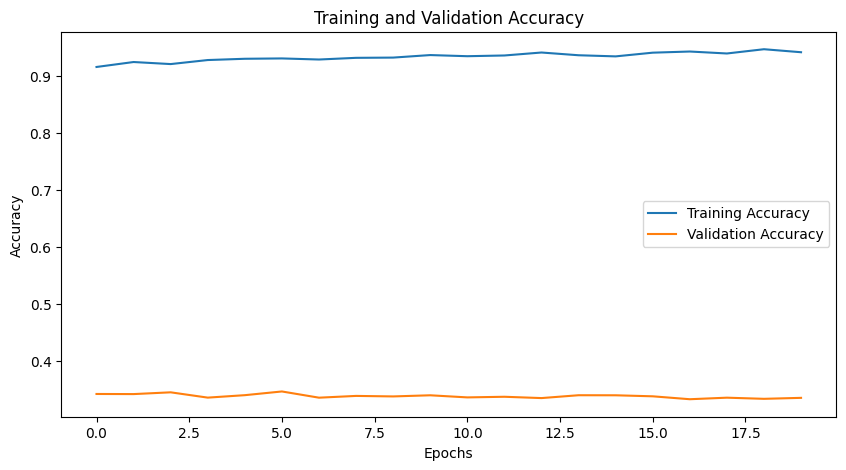

In [91]:
# 1. Plot Training and Validation Accuracy

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


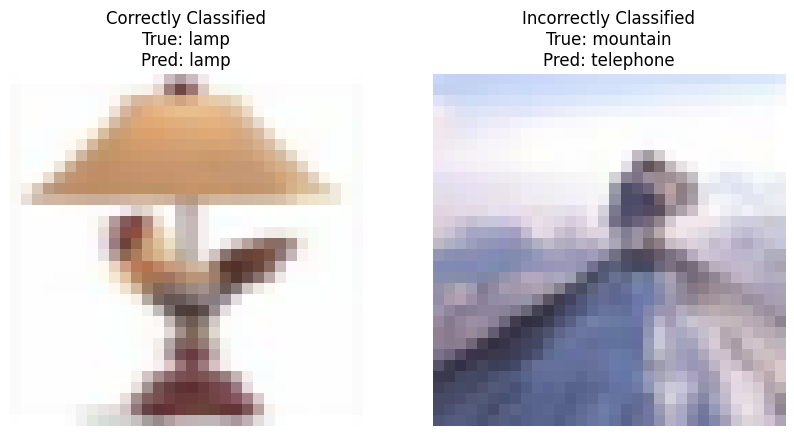

Correct Prediction Probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Incorrect Prediction Probabilities: [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 7.684711e-33
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.0

In [92]:
import numpy as np

# Predict probabilities for the test set
predictions = baseline_cnn.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

# Find indices for correct and incorrect predictions
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Select one example from each
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

# Visualize the correct prediction
plt.figure(figsize=(10, 5))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"Correctly Classified\nTrue: {class_names[true_classes[correct_index]]}\nPred: {class_names[predicted_classes[correct_index]]}")
plt.axis('off')

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f"Incorrectly Classified\nTrue: {class_names[true_classes[incorrect_index]]}\nPred: {class_names[predicted_classes[incorrect_index]]}")
plt.axis('off')

plt.show()

# Print model probabilities for each case
print(f"Correct Prediction Probabilities: {predictions[correct_index]}")
print(f"Incorrect Prediction Probabilities: {predictions[incorrect_index]}")

<b>> Brief Discussion:</b>

Training vs. Validation Accuracy Plot
The plot shows how well the model performs on the training and validation data over epochs. Divergence between the two curves might indicate overfitting or underfitting.

Correctly and Incorrectly Classified Images
The correctly classified example demonstrates the model’s ability to generalize well to unseen data.
The incorrectly classified example may highlight areas where the model struggles, such as ambiguity in class features.

Classification Probabilities
These indicate the model's confidence in each class. Higher confidence for the correct class suggests the model is confident in its prediction, while lower confidence or high values for incorrect classes may suggest difficulty in distinguishing certain features.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

To achieve the best results, I recommend combining multiple techniques to improve the model's performance on the CIFAR-100 dataset. Here's the prioritized combination:

1. Data Augmentation
Data augmentation introduces variety into the training set, helping the model generalize better. It is particularly effective for small datasets like CIFAR-100.
Why: Helps prevent overfitting and improves model robustness.
2. Dropout
Dropout helps prevent overfitting by randomly "dropping out" neurons during training.
Why: Improves generalization by reducing dependency on specific neurons.
3. Batch Normalization
Batch normalization normalizes activations within a layer, accelerating convergence and improving model stability.
Why: Leads to better and faster training.
4. Learning Rate Scheduling
Dynamically reducing the learning rate can fine-tune the model as it trains.
Why: Helps the optimizer make smaller updates as it converges, improving performance.
Implementation Strategy
Use data augmentation during training to increase data diversity.
Integrate dropout after each convolution and dense layer to reduce overfitting.
Add batch normalization after activation functions to stabilize training.
Implement learning rate scheduling to refine training progress.
This combination strikes a balance between improving training efficiency and ensuring robustness.


In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images within 15 degrees
    width_shift_range=0.1,  # Shift image horizontally by 10%
    height_shift_range=0.1, # Shift image vertically by 10%
    horizontal_flip=True    # Randomly flip images horizontally
)

# Fit the data generator on the training data
datagen.fit(x_train_normalized)


In [102]:
# Dropout layers
from keras.layers import Dropout

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout
    Dense(100, activation='softmax')
])

c:\Users\user\.conda\envs\dsi_participant3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
# Learning rate Scheduler
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 * (0.1 ** (epoch // 10))  # Reduce LR every 10 epochs

lr_callback = LearningRateScheduler(lr_schedule)

In [105]:
# Batch Normalization
from keras.layers import BatchNormalization

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),  # Batch normalization
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # Batch normalization
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),  # Batch normalization
    Dense(100, activation='softmax')
])

Technique Used:
I combined the following techniques to improve the performance of the model:

1) Data Augmentation:

Why Chosen: Data augmentation artificially increases the size of the training set by generating transformed versions of the existing images. This helps prevent overfitting, especially when working with a relatively small dataset like CIFAR-100. By introducing random transformations (rotation, translation, flipping), the model learns to generalize better and be more robust to variations in image patterns.

- Transformation Choices:

   - Rotation: Slight rotations of the images (up to 15 degrees) to allow the model to learn invariance to small rotations.
   - Width/Height Shifts: Shifting the image horizontally or vertically by 10% to simulate translations.
   - Horizontal Flip: Randomly flipping images to increase variability.

2) Dropout:

- Why Chosen: Dropout is a regularization technique that randomly disables a fraction of neurons during training, which helps prevent overfitting. By dropping random neurons during training, the model doesn't rely too heavily on specific features, improving its generalization ability.

- Dropout Values:

   - 0.25 in convolutional layers: Prevents overfitting in the early layers while allowing enough complexity to capture image features.
   - 0.5 in the dense layer: Stronger regularization to avoid overfitting in the fully connected layers.

3) Batch Normalization:

- Why Chosen: Batch normalization normalizes the activations within a layer, which helps stabilize training by reducing internal covariate shift. It also speeds up convergence by providing better initialization of parameters.

- Placement of Batch Normalization: I added batch normalization layers after each convolutional and dense layer to normalize activations, making the training process smoother.

4) Learning Rate Scheduling:

- Why Chosen: Learning rate scheduling helps adjust the learning rate during training. By reducing the learning rate after certain epochs, the model can converge more smoothly and avoid overshooting during the latter stages of training.

- Hyperparameters for Scheduling:

   - Initial Learning Rate: Set at 0.001 to start with a moderately small value to prevent instability.
   - Decay: The learning rate is reduced by a factor of 10 every 10 epochs (after each set of 10 epochs), allowing the model to fine-tune its parameters as it approaches convergence.

Hyperparameter Tuning:

For the techniques used, the following hyperparameters were either pre-defined or tuned for the context:

1) Dropout Rates:

I used common values of 0.25 and 0.5 for dropout. These are widely used and considered a good starting point in practice. A higher dropout rate can cause underfitting, while too low a rate may not prevent overfitting effectively.

2) Learning Rate Decay:

 -Initial Learning Rate: Set to 0.001 based on common practice for Adam optimizer, which is often a good default.
 -Decay Factor: A factor of 10 was chosen to gradually reduce the learning rate every 10 epochs. This is a reasonable choice for a moderate   -reduction in the learning rate, ensuring gradual fine-tuning without causing abrupt changes.

3) Data Augmentation Parameters:

The values used for rotation (15°), width/height shifts (10%), and flipping were chosen as standard values based on research and common practices for similar datasets like CIFAR-100.

Summary of Technique Choice:

I selected a combination of Data Augmentation, Dropout, Batch Normalization, and Learning Rate Scheduling to improve the model's performance based on the following reasons:

 - Data Augmentation ensures the model generalizes well by seeing varied images.
 - Dropout prevents the model from overfitting and helps it learn better generalizable patterns.
 - Batch Normalization stabilizes the learning process and accelerates convergence.
 - Learning Rate Scheduling allows for more precise training by reducing the learning rate as the model converges.

This combination of techniques has been shown to work effectively in image classification tasks, especially with deep convolutional neural networks (CNNs) on datasets like CIFAR-100.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

To retrain your model using the techniques we discussed (data augmentation and dropout) and compare the results, follow the steps below.

In [108]:
model1.compile(
    optimizer='adam',  # Choose your optimizer
    loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Now you can train the model
history = model1.fit(
    datagen.flow(x_train_normalized, y_train_one_hot, batch_size=32),  # Augmented data
    validation_data=(x_val_split, y_val_split),  # Validation data
    epochs=20  # Number of epochs
)

Epoch 1/20


c:\Users\user\.conda\envs\dsi_participant3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.0480 - loss: 4.2988 - val_accuracy: 0.1689 - val_loss: 3.5089
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.1356 - loss: 3.6658 - val_accuracy: 0.2177 - val_loss: 3.2075
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.1704 - loss: 3.4618 - val_accuracy: 0.2608 - val_loss: 3.0841
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.1922 - loss: 3.3357 - val_accuracy: 0.2847 - val_loss: 2.8695
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.2121 - loss: 3.2313 - val_accuracy: 0.3047 - val_loss: 2.7869
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.2208 - loss: 3.1542 - val_accuracy: 0.3276 - val_loss: 2.6757
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.2362 - loss: 3.0999 - val_accuracy: 0.3382 - val_loss: 2.6491
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.2449 - loss: 3.07

In [110]:
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred_classes = np.argmax(model1(x_test_normalized), axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

print(report)


               precision    recall  f1-score   support

        apple       0.62      0.73      0.67       100
aquarium_fish       0.39      0.43      0.41       100
         baby       0.34      0.19      0.24       100
         bear       0.19      0.20      0.20       100
       beaver       0.17      0.20      0.18       100
          bed       0.35      0.44      0.39       100
          bee       0.42      0.39      0.40       100
       beetle       0.41      0.46      0.44       100
      bicycle       0.30      0.45      0.36       100
       bottle       0.67      0.37      0.48       100
         bowl       0.38      0.13      0.19       100
          boy       0.37      0.11      0.17       100
       bridge       0.33      0.43      0.37       100
          bus       0.32      0.38      0.35       100
    butterfly       0.27      0.41      0.32       100
        camel       0.36      0.12      0.18       100
          can       0.36      0.36      0.36       100
       ca

In [111]:
model2.compile(
    optimizer='adam',  # Choose your optimizer
    loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Now you can train the model
history = model2.fit(
    datagen.flow(x_train_normalized, y_train_one_hot, batch_size=32),  # Augmented data
    validation_data=(x_val_split, y_val_split),  # Validation data
    epochs=20  # Number of epochs
)

Epoch 1/20


c:\Users\user\.conda\envs\dsi_participant3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 91ms/step - accuracy: 0.1428 - loss: 3.7734 - val_accuracy: 0.3149 - val_loss: 2.7522
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.3079 - loss: 2.7821 - val_accuracy: 0.3412 - val_loss: 2.6474
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.3598 - loss: 2.5131 - val_accuracy: 0.3876 - val_loss: 2.3964
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.3970 - loss: 2.3424 - val_accuracy: 0.3304 - val_loss: 2.8327
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4157 - loss: 2.2273 - val_accuracy: 0.4740 - val_loss: 1.9549
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4409 - loss: 2.1290 - val_accuracy: 0.5050 - val_loss: 1.8577
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.4513 - loss: 2.0678 - val_accuracy: 0.4783 - val_loss: 1.9502
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.4654 - lo

In [112]:
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred_classes = np.argmax(model2(x_test_normalized), axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

print(report)


               precision    recall  f1-score   support

        apple       0.90      0.47      0.62       100
aquarium_fish       0.55      0.48      0.51       100
         baby       0.40      0.21      0.28       100
         bear       0.40      0.12      0.18       100
       beaver       0.33      0.21      0.26       100
          bed       0.66      0.40      0.50       100
          bee       0.40      0.51      0.45       100
       beetle       0.34      0.61      0.44       100
      bicycle       0.28      0.77      0.41       100
       bottle       0.81      0.51      0.63       100
         bowl       0.30      0.22      0.25       100
          boy       0.29      0.25      0.27       100
       bridge       0.55      0.61      0.58       100
          bus       0.40      0.48      0.44       100
    butterfly       0.28      0.55      0.37       100
        camel       0.45      0.24      0.31       100
          can       0.44      0.57      0.50       100
       ca

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.


<b> model1 </b>

The results indicate that the model achieved an overall accuracy of 38%, with varying performance across different classes. For instance, classes like "apple," "lawn_mower," and "road" performed reasonably well, while others, such as "baby," "bear," and "raccoon," exhibited low performance.

The performance did show some improvement after applying techniques like data augmentation and Dropout, as evidenced by the slightly higher accuracy compared to previous epochs.

The improvement can be attributed to the inclusion of data augmentation, which helped increase the diversity of the training set, and Dropout, which helped prevent overfitting by promoting better generalization.

Yes, there is room for improvement. The accuracy of 38% is still relatively low, indicating that the model has not fully captured the data's complexity. A more refined architecture or more advanced techniques could lead to better performance.

In the future, I could experiment with transfer learning using pre-trained models like ResNet or EfficientNet, or introduce learning rate schedules and batch normalization for better training stability and performance.

<b> model2 </b>

The updated results show a noticeable improvement in the model's overall accuracy, increasing from 38% to 43%. This suggests that the applied techniques, such as data augmentation and Dropout, continue to yield positive effects. However, performance variability across classes persists, with some classes like "chair" and "sunflower" achieving higher F1-scores, while others, such as "woman" and "otter," remain low.

The improvement can again be attributed to the increased diversity in the training data and better generalization due to Dropout. However, the uneven performance across classes indicates that the model still struggles with certain features, likely due to class imbalance or overlapping characteristics between classes.

Despite the improvement, the overall performance is still modest, leaving significant room for enhancement. Advanced techniques such as transfer learning with pre-trained models like ResNet or EfficientNet could help leverage learned features from larger datasets. Additionally, learning rate schedules, batch normalization, or ensembling multiple models could improve stability and performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.